In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check how many images are in every folder

In [ ]:
import os
import glob
import pandas as pd

dataset_path = '/content/drive/MyDrive/mendeley_dataset'

class_counts = {}
class_image_paths = {}

for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        images = glob.glob(os.path.join(class_folder, '*.jpg'))
        class_counts[class_name] = len(images)
        class_image_paths[class_name] = images

df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])
df.sort_values(by="Count", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Class,Count
0,Healthy,18983
1,Miner,16978
2,Leaf rust,8192
3,Cerscospora,7681
4,Phoma,6571


Check for corrupted images

In [ ]:
from PIL import Image
import os

folder_path = '/content/drive/MyDrive/mendeley_datasets'
corrupted = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify that it is, indeed, an image
        except (IOError, SyntaxError) as e:
            corrupted.append(file_path)

print(f"Found {len(corrupted)} corrupted images.")


Found 0 corrupted images.


Check for duplicate files

In [ ]:
pip install imagehash

In [ ]:
import imagehash
from PIL import Image
import os

folder_path = '/content/drive/MyDrive/mendeley_datasets'
hashes = {}
duplicates = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img_hash = imagehash.average_hash(img)
            if img_hash in hashes:
                duplicates.append((file_path, hashes[img_hash]))
            else:
                hashes[img_hash] = file_path
        except Exception as e:
            pass

print(f"Found {len(duplicates)} duplicate images.")


Found 0 duplicate images.


Exploratory Data Analysis

Bar plot to see how balanced the data set is. Sample images grid to see how some of the images in the 5 classes look like.

In [ ]:
"""# Install necessary packages if not already installed
!pip install -q seaborn

# Import libraries
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

# Set your dataset folder path
dataset_path = '/content/drive/MyDrive/mendeley_dataset'

# Define class labels
class_labels = {
    'Healthy': 'Healthy',
    'Miner': 'Miner',
    'Leaf rust': 'Leaf Rust',
    'Cerscospora': 'Cercospora',
    'Phoma': 'Phoma'
}

# Step 1: Count number of images per class
image_counts = {}

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        image_counts[class_labels.get(folder, folder)] = len(image_files)

# Plotting the image counts
plt.figure(figsize=(10,6))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette='viridis')
plt.title('Number of Images per Class')
plt.ylabel('Number of Images')
plt.xlabel('Disease Class')
plt.xticks(rotation=45)
plt.show();

# Step 2: Display some sample images from each class
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
fig.suptitle('Sample Images from Each Class', fontsize=20)

for idx, (folder, label) in enumerate(class_labels.items()):
    folder_path = os.path.join(dataset_path, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    selected_files = random.sample(image_files, 5)  # Pick 5 random images per class

    for j in range(5):
        img_path = os.path.join(folder_path, selected_files[j])
        img = Image.open(img_path)
        ax = axes[idx, j]
        ax.imshow(img)
        ax.axis('off')
        if j == 0:
            ax.set_title(label, fontsize=12)

plt.tight_layout()
plt.show()"""



"# Install necessary packages if not already installed\n!pip install -q seaborn\n\n# Import libraries\nimport os\nimport random\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom PIL import Image\nimport pandas as pd\n\n# Set your dataset folder path\ndataset_path = '/content/drive/MyDrive/mendeley_dataset'\n\n# Define class labels\nclass_labels = {\n    'Healthy': 'Healthy',\n    'Miner': 'Miner',\n    'Leaf rust': 'Leaf Rust',\n    'Cerscospora': 'Cercospora',\n    'Phoma': 'Phoma'\n}\n\n# Step 1: Count number of images per class\nimage_counts = {}\n\nfor folder in os.listdir(dataset_path):\n    folder_path = os.path.join(dataset_path, folder)\n    if os.path.isdir(folder_path):\n        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]\n        image_counts[class_labels.get(folder, folder)] = len(image_files)\n\n# Plotting the image counts\nplt.figure(figsize=(10,6))\nsns.barplot(x=list(image_counts.keys()), y=list(image_counts.va

Check the variation in the size of the images in the data set

In [ ]:
"""# (Optional) Step 3: Analyze image size distribution
image_sizes = []

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        for img_file in image_files:
            img_path = os.path.join(folder_path, img_file)
            img = Image.open(img_path)
            image_sizes.append(img.size)

# Convert sizes to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])

plt.figure(figsize=(10,6))
sns.histplot(sizes_df['Width'], bins=30, kde=True, color='blue', label='Width')
sns.histplot(sizes_df['Height'], bins=30, kde=True, color='red', label='Height')
plt.title('Distribution of Image Widths and Heights')
plt.xlabel('Pixels')
plt.ylabel('Count')
plt.legend()
plt.show();"""

"# (Optional) Step 3: Analyze image size distribution\nimage_sizes = []\n\nfor folder in os.listdir(dataset_path):\n    folder_path = os.path.join(dataset_path, folder)\n    if os.path.isdir(folder_path):\n        image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]\n        for img_file in image_files:\n            img_path = os.path.join(folder_path, img_file)\n            img = Image.open(img_path)\n            image_sizes.append(img.size)\n\n# Convert sizes to DataFrame\nsizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])\n\nplt.figure(figsize=(10,6))\nsns.histplot(sizes_df['Width'], bins=30, kde=True, color='blue', label='Width')\nsns.histplot(sizes_df['Height'], bins=30, kde=True, color='red', label='Height')\nplt.title('Distribution of Image Widths and Heights')\nplt.xlabel('Pixels')\nplt.ylabel('Count')\nplt.legend()\nplt.show();"

In [ ]:
#sizes_df[sizes_df['Height'] != sizes_df['Width']].count()

In [ ]:
#sizes_df['Height'].unique()

In [ ]:
#sizes_df.describe()

In [ ]:
"""# Group by Width and Height, and count how many times each pair appears
size_counts = sizes_df.groupby(['Width', 'Height']).size().reset_index(name='Count')

# Sort descending by frequency
size_counts = size_counts.sort_values(by='Count', ascending=False)

# Display the result
print(size_counts)

# Plot number of images per (Width, Height) pair
plt.figure(figsize=(12,8))
sns.barplot(
    data=size_counts,
    x='Count',
    y=size_counts.apply(lambda row: f"{row['Width']}x{row['Height']}", axis=1),
    palette='mako'
)
plt.title('Frequency of Image Sizes')
plt.xlabel('Number of Images')
plt.ylabel('Image Size (Width x Height)')
plt.show()"""

'# Group by Width and Height, and count how many times each pair appears\nsize_counts = sizes_df.groupby([\'Width\', \'Height\']).size().reset_index(name=\'Count\')\n\n# Sort descending by frequency\nsize_counts = size_counts.sort_values(by=\'Count\', ascending=False)\n\n# Display the result\nprint(size_counts)\n\n# Plot number of images per (Width, Height) pair\nplt.figure(figsize=(12,8))\nsns.barplot(\n    data=size_counts,\n    x=\'Count\',\n    y=size_counts.apply(lambda row: f"{row[\'Width\']}x{row[\'Height\']}", axis=1),\n    palette=\'mako\'\n)\nplt.title(\'Frequency of Image Sizes\')\nplt.xlabel(\'Number of Images\')\nplt.ylabel(\'Image Size (Width x Height)\')\nplt.show()'

In [ ]:
"""# First, group and count (already done before)
size_counts = sizes_df.groupby(['Width', 'Height']).size().reset_index(name='Count')

# Remove (128, 128) from the table
size_counts_filtered = size_counts[~((size_counts['Width'] == 128) & (size_counts['Height'] == 128))]

# Sort (optional, for nice plot)
size_counts_filtered = size_counts_filtered.sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12,8))
sns.barplot(
    data=size_counts_filtered,
    x='Count',
    y=size_counts_filtered.apply(lambda row: f"{row['Width']}x{row['Height']}", axis=1),
    palette='mako'
)
plt.title('Frequency of Image Sizes (excluding 128x128)')
plt.xlabel('Number of Images')
plt.ylabel('Image Size (Width x Height)')
plt.show()"""

'# First, group and count (already done before)\nsize_counts = sizes_df.groupby([\'Width\', \'Height\']).size().reset_index(name=\'Count\')\n\n# Remove (128, 128) from the table\nsize_counts_filtered = size_counts[~((size_counts[\'Width\'] == 128) & (size_counts[\'Height\'] == 128))]\n\n# Sort (optional, for nice plot)\nsize_counts_filtered = size_counts_filtered.sort_values(by=\'Count\', ascending=False)\n\n# Plot\nplt.figure(figsize=(12,8))\nsns.barplot(\n    data=size_counts_filtered,\n    x=\'Count\',\n    y=size_counts_filtered.apply(lambda row: f"{row[\'Width\']}x{row[\'Height\']}", axis=1),\n    palette=\'mako\'\n)\nplt.title(\'Frequency of Image Sizes (excluding 128x128)\')\nplt.xlabel(\'Number of Images\')\nplt.ylabel(\'Image Size (Width x Height)\')\nplt.show()'

Feature Engineering: Image resizing and Normalization

In [ ]:
!pip install -q tensorflow

Imports and Setup

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix


Load Dataset and Prepare Hold-Out Test Set

In [ ]:
# Parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 5
BATCH_SIZE = 32
EPOCHS = 20
KFOLDS = 3

# Dataset path
data_dir = '/content/drive/MyDrive/mendeley_dataset'

# Map class names to labels
class_names = sorted(os.listdir(data_dir))
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

# Load all image paths and labels
image_paths = []
labels = []

for cls in class_names:
    folder = os.path.join(data_dir, cls)
    for img_file in os.listdir(folder):
        if img_file.lower().endswith(('jpg', 'jpeg', 'png')):
            image_paths.append(os.path.join(folder, img_file))
            labels.append(class_to_idx[cls])

image_paths = np.array(image_paths)
labels = np.array(labels)

# Split off 15% as the hold-out test set
image_paths_trainval, image_paths_test, labels_trainval, labels_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)


Dataset Loader with tf.data

In [ ]:
def preprocess_image(file_path, label):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0
    return img, tf.one_hot(label, NUM_CLASSES)

def get_dataset(paths, labels):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds


K-Fold Training Loop


--- Fold 1 ---
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1037/1037 - 1002s - 967ms/step - accuracy: 0.9173 - loss: 0.2452 - val_accuracy: 0.9980 - val_loss: 0.0103
Epoch 2/20
1037/1037 - 867s - 836ms/step - accuracy: 0.9868 - loss: 0.0505 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 3/20
1037/1037 - 882s - 850ms/step - accuracy: 0.9936 - loss: 0.0247 - val_accuracy: 0.9916 - val_loss: 0.0250
Epoch 4/20
1037/1037 - 825s - 795ms/step - accuracy: 0.9929 - loss: 0.0270 - val_accuracy: 0.9993 - val_loss: 8.2781e-04
Epoch 5/20
1037/1037 - 856s - 825ms/step - accuracy: 0.9945 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 3.0702e-06
Epoch 6/20
1037/1037 - 851s - 820ms/step - accuracy: 0.9964 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 2.5466e-06
Epoch 7/20
1037/1037 - 835s - 805ms/step - accuracy: 0.9968 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 2.5138e-05
Epoch 8/20
1037/1037 - 891s - 859ms/step - accuracy: 0.9938 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 1.9727e-05
Epoch 9/20
1037/1037 - 847s - 817ms/step - accuracy: 0

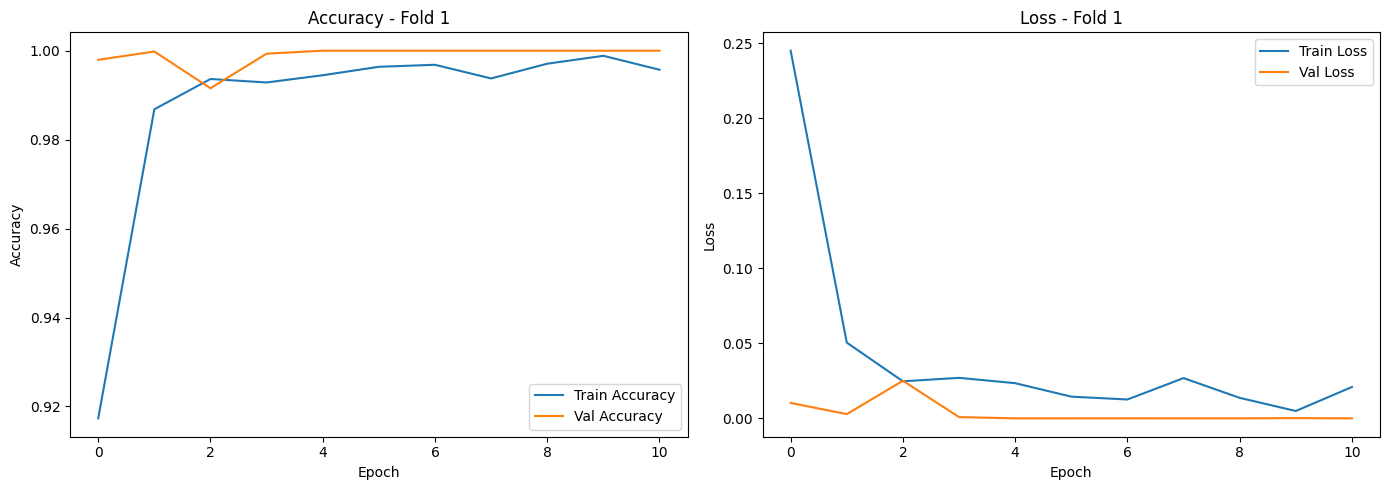


--- Fold 2 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1037/1037 - 880s - 848ms/step - accuracy: 0.9101 - loss: 0.2587 - val_accuracy: 0.8520 - val_loss: 0.3691
Epoch 2/20
1037/1037 - 921s - 888ms/step - accuracy: 0.9814 - loss: 0.0631 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/20
1037/1037 - 883s - 851ms/step - accuracy: 0.9919 - loss: 0.0293 - val_accuracy: 1.0000 - val_loss: 3.3000e-04
Epoch 4/20
1037/1037 - 883s - 851ms/step - accuracy: 0.9939 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 1.8405e-04
Epoch 5/20
1037/1037 - 921s - 888ms/step - accuracy: 0.9938 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 1.2878e-05
Epoch 6/20
1037/1037 - 911s - 878ms/step - accuracy: 0.9963 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 8.7428e-06
Epoch 7/20
1037/1037 - 878s - 847ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 5.2956e-05
Epoch 8/20
1037/1037 - 893s - 861ms/step - accuracy: 0.9963 - loss: 0.0156 - val_accuracy: 0.9993 - val_loss: 0.0075
Epoch 9/20
1037/1037 - 906s - 874ms/step - a

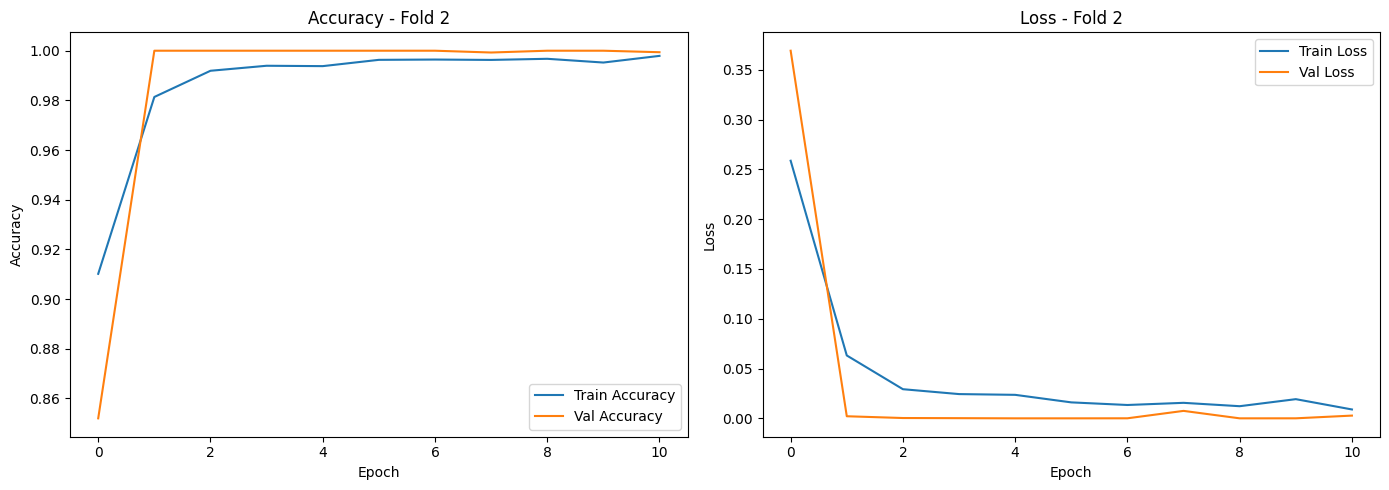


--- Fold 3 ---
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1037/1037 - 858s - 828ms/step - accuracy: 0.9187 - loss: 0.2419 - val_accuracy: 0.9994 - val_loss: 0.0028
Epoch 2/20
1037/1037 - 854s - 823ms/step - accuracy: 0.9851 - loss: 0.0533 - val_accuracy: 1.0000 - val_loss: 8.8806e-04
Epoch 3/20
1037/1037 - 828s - 798ms/step - accuracy: 0.9922 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 2.1023e-04
Epoch 4/20
1037/1037 - 823s - 793ms/step - accuracy: 0.9947 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 1.4389e-04
Epoch 5/20
1037/1037 - 835s - 805ms/step - accuracy: 0.9941 - loss: 0.0231 - val_accuracy: 0.9925 - val_loss: 0.0219
Epoch 6/20
1037/1037 - 866s - 835ms/step - accuracy: 0.9933 - loss: 0.0270 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 7/20
1037/1037 - 911s - 878ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 9.3148e-07
Epoch 8/20
1037/1037 - 853s - 823ms/step - accuracy: 0.9966 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 1.7340e-05
Epoch 9/20
1037/1037 - 841s - 811ms/step - accuracy: 0.

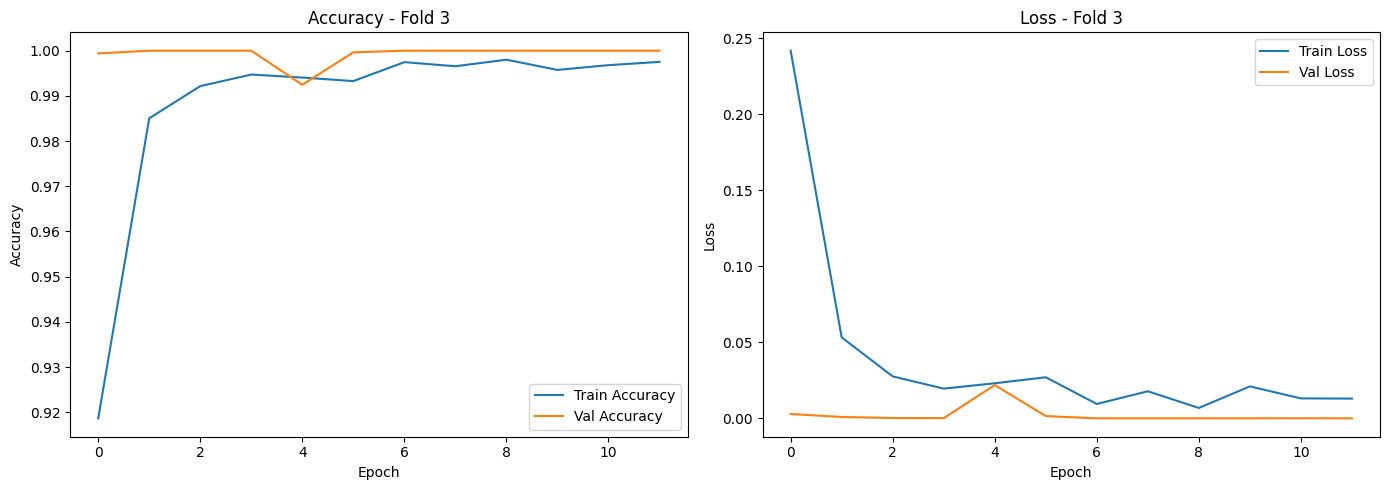

In [ ]:
skf = StratifiedKFold(n_splits=KFOLDS, shuffle=True, random_state=42)
fold = 1
all_fold_accuracies = []

for train_idx, val_idx in skf.split(image_paths_trainval, labels_trainval):
    print(f"\n--- Fold {fold} ---")

    train_paths = image_paths_trainval[train_idx]
    val_paths = image_paths_trainval[val_idx]
    y_train = labels_trainval[train_idx]
    y_val = labels_trainval[val_idx]

    train_ds = get_dataset(train_paths, y_train)
    val_ds = get_dataset(val_paths, y_val)

    # Class weights
    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weights_dict = dict(enumerate(class_weights))

    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train
    history = model.fit(train_ds,
                        validation_data=val_ds,
                        epochs=EPOCHS,
                        class_weight=class_weights_dict,
                        callbacks=[early_stop],
                        verbose=2)

    model.save(f'model_fold_{fold}.h5')

    # Evaluate
    val_accuracy = history.history['val_accuracy'][-1]
    all_fold_accuracies.append(val_accuracy)

    # Plotting
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'Accuracy - Fold {fold}')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - Fold {fold}')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

    plt.tight_layout()
    plt.show()

    fold += 1


Cross-Validation Summary

In [ ]:
print("\n=== Cross-validation Summary ===")
print("Fold Accuracies:", all_fold_accuracies)
print("Average Accuracy: {:.4f}".format(np.mean(all_fold_accuracies)))
print("Standard Deviation: {:.4f}".format(np.std(all_fold_accuracies)))



=== Cross-validation Summary ===
Fold Accuracies: [1.0, 0.9993972182273865, 1.0]
Average Accuracy: 0.9998
Standard Deviation: 0.0003


Final Test Set Evaluation


=== Final Test Set Evaluation ===
Test Accuracy: 1.0000
275/275 ━━━━━━━━━━━━━━━━━━━━ 66s 237ms/step


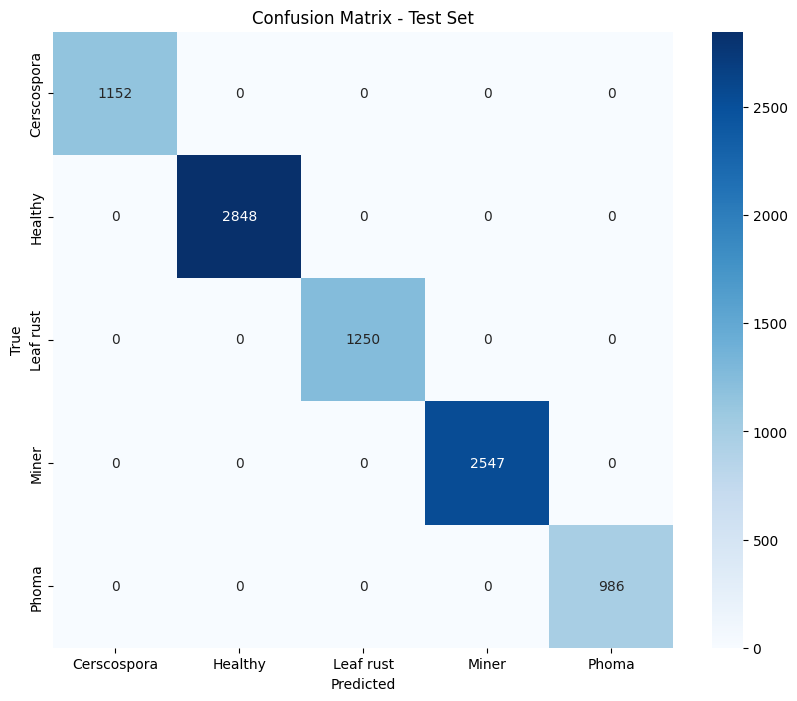

              precision    recall  f1-score   support

 Cerscospora       1.00      1.00      1.00      1152
     Healthy       1.00      1.00      1.00      2848
   Leaf rust       1.00      1.00      1.00      1250
       Miner       1.00      1.00      1.00      2547
       Phoma       1.00      1.00      1.00       986

    accuracy                           1.00      8783
   macro avg       1.00      1.00      1.00      8783
weighted avg       1.00      1.00      1.00      8783



In [ ]:
print("\n=== Final Test Set Evaluation ===")

test_ds = get_dataset(image_paths_test, labels_test)
y_test_onehot = tf.one_hot(labels_test, NUM_CLASSES)

# Use last trained model (or load your best one)
test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_probs = model.predict(test_ds)
y_pred = np.argmax(y_probs, axis=1)
y_true = labels_test

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import os

# List all .h5 files in the current directory
model_files = [f for f in os.listdir() if f.endswith('.h5')]
print(model_files)


['model_fold_1.h5', 'model_fold_2.h5', 'model_fold_3.h5']


In [ ]:
from google.colab import files
files.download('model_fold_1.h5')  # Replace with actual filename


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('model_fold_2.h5')  # Replace with actual filename


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('model_fold_3.h5')  # Replace with actual filename


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>